In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle as pk
from sklearn.metrics import confusion_matrix, classification_report,precision_score, accuracy_score
import seaborn as sns 
import tensorflow as tf 


In [2]:
# Load the dataset
file_path = "../data/water_potability.csv"
data = pd.read_csv(file_path)

# Data Preprocessing
target_column = "Potability"
X = data.drop(target_column, axis=1)
Y = data[target_column]

# Handle

In [4]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [57]:

# Handle missing values (e.g., by filling with mean values)
X.fillna(X.mean(), inplace=True)



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.2, random_state=101)

In [58]:
trainX

array([[-0.22455346,  0.33110554,  0.1857941 , ..., -2.50466696,
        -2.2511835 , -1.52392137],
       [ 0.31226626,  0.17003391,  0.53634567, ...,  0.21183542,
         1.08708139,  0.31257612],
       [ 0.71269854,  1.05850384, -0.23491073, ...,  0.22164165,
        -0.19377388,  0.91245609],
       ...,
       [-1.47938774, -0.68716391, -0.8244282 , ..., -1.96788075,
        -1.75056486, -1.04380313],
       [-0.58732464,  0.22320252, -0.73186741, ...,  0.09437927,
         0.2825236 ,  0.23502418],
       [ 0.41136922,  1.03320083, -1.67548782, ..., -0.01542441,
         0.48659444,  0.27221703]])

In [80]:
# Model Architecture
model = Sequential(
    [
        Dense(
            64,
            activation="relu",
            input_shape=(trainX.shape[1],),
            kernel_regularizer=l1(0.001),
        ),
        Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        Dense(1, activation="sigmoid"), 
    ]
)

/home/it/anaconda3/envs/my_tens/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)


In [82]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [83]:
# Train the model
history = model.fit(
    trainX,
    trainY,
    validation_split=0.3,
    epochs=100,
    batch_size=20,
    callbacks=[early_stopping],
)


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5793 - loss: 0.8079 - val_accuracy: 0.6163 - val_loss: 0.7736
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6262 - loss: 0.7674 - val_accuracy: 0.6302 - val_loss: 0.7528
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - loss: 0.7382 - val_accuracy: 0.6607 - val_loss: 0.7308
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6541 - loss: 0.7266 - val_accuracy: 0.6645 - val_loss: 0.7159
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - loss: 0.7124 - val_accuracy: 0.6760 - val_loss: 0.7031
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - loss: 0.7028 - val_accuracy: 0.6925 - val_loss: 0.6931
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.6869 - val_accuracy: 0.6823 - val_loss: 0.6922
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7011 - loss: 0.6706 - val_accuracy: 0.6823 - v

In [84]:
# Model Evaluation
evaluation = model.evaluate(testX, testY)
test_loss = evaluation[0]
test_accuracy = evaluation[1]

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6855 - loss: 0.6626
Test Loss: 0.6622279286384583, Test Accuracy: 0.6829268336296082


In [86]:
# lets print the confusion matrix and classification report
predictions = model.predict(testX)
predictions = np.round(predictions)

# classification report 
print(classification_report(testY, predictions))
print(confusion_matrix(testY, predictions))

accuracy = accuracy_score(testY, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(testY, predictions)
print(f"Precision: {precision}")



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       402
           1       0.64      0.43      0.51       254

    accuracy                           0.68       656
   macro avg       0.67      0.64      0.64       656
weighted avg       0.67      0.68      0.67       656

[[340  62]
 [146 108]]
Accuracy: 0.6829268292682927
Precision: 0.6352941176470588


Confusion Matrix


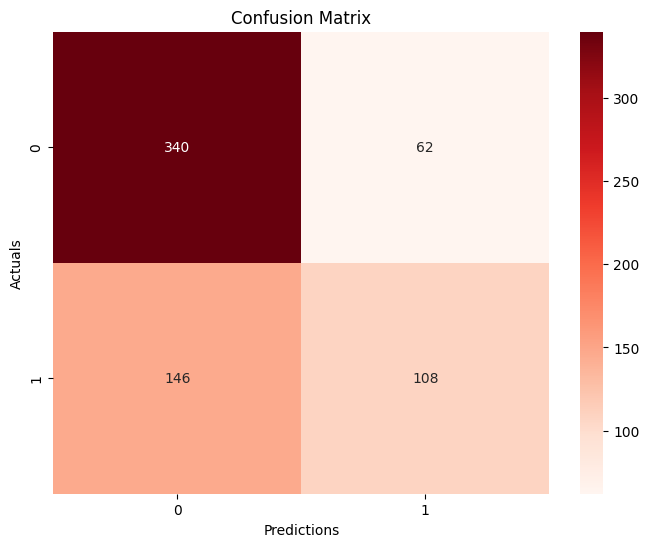

In [87]:

print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()



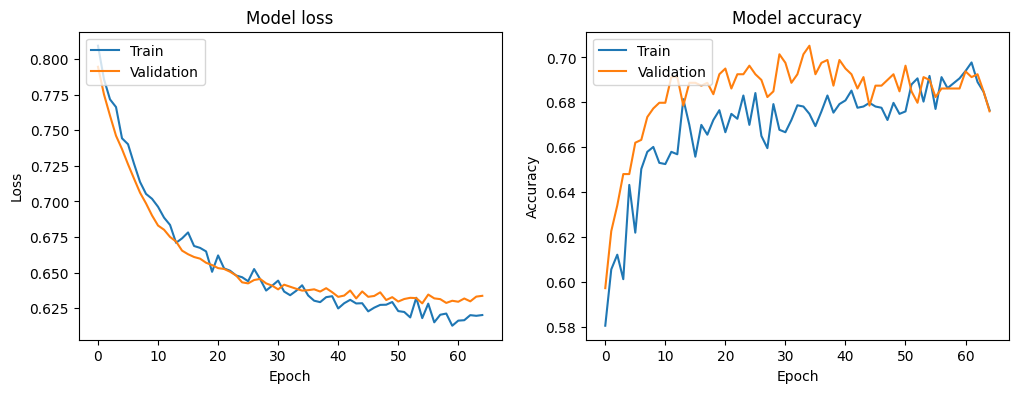

In [67]:
# Summary of the process and results
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
